In [1]:
!pip install -q hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.5 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import  GaussianNB

In [67]:
data = pd.read_csv("results.csv",encoding='windows-1254')

In [68]:
data

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


In [69]:
data=data.iloc[8524:11113]

In [70]:
data

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
8524,2015-16,2015-08-08T00:00:00Z,Bournemouth,Aston Villa,0,1,A,0.0,0.0,D,...,2.0,3.0,6.0,3.0,13.0,13.0,3.0,4.0,0.0,0.0
8525,2015-16,2015-08-08T00:00:00Z,Chelsea,Swansea,2,2,D,2.0,1.0,H,...,3.0,10.0,4.0,8.0,15.0,16.0,1.0,3.0,1.0,0.0
8526,2015-16,2015-08-08T00:00:00Z,Everton,Watford,2,2,D,0.0,1.0,A,...,5.0,5.0,8.0,2.0,7.0,13.0,1.0,2.0,0.0,0.0
8527,2015-16,2015-08-08T00:00:00Z,Leicester,Sunderland,4,2,H,3.0,0.0,H,...,8.0,5.0,6.0,3.0,13.0,17.0,2.0,4.0,0.0,0.0
8528,2015-16,2015-08-08T00:00:00Z,Man United,Tottenham,1,0,H,1.0,0.0,H,...,1.0,4.0,1.0,2.0,12.0,12.0,2.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


(16.5, -0.5)

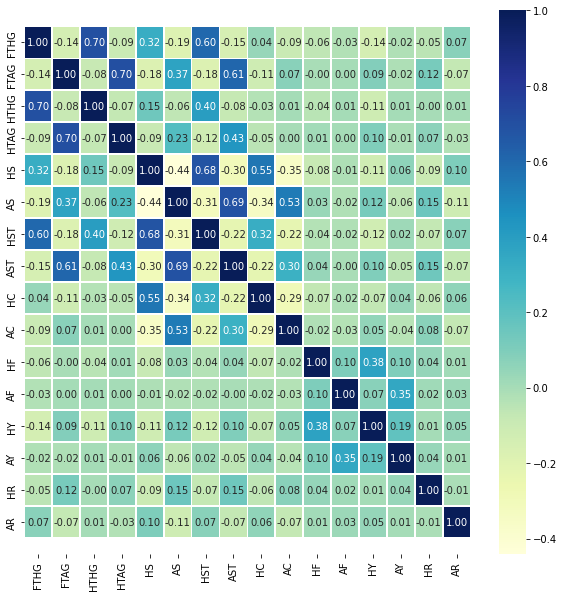

In [71]:
corrleation_matrix=data.corr()
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(corrleation_matrix,annot=True,linewidths=0.8,fmt=".2f",cmap="YlGnBu");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

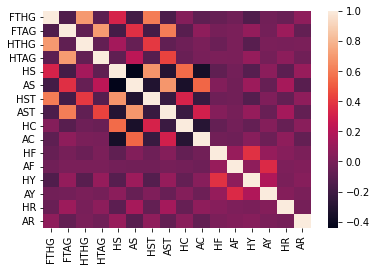

In [72]:
df = pd.DataFrame(data)

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

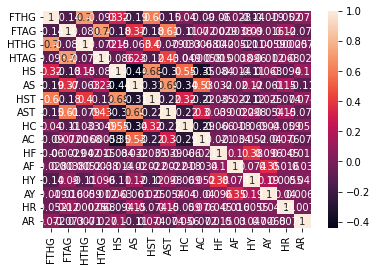

In [73]:
df = pd.DataFrame(data)

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Text(0, 0.5, 'Index')

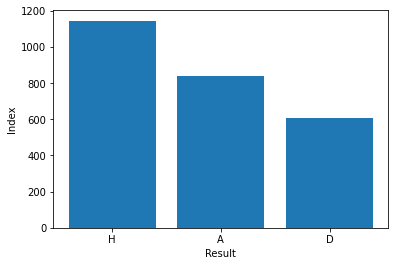

In [74]:
fig,ax=plt.subplots()
Full_Time_Results=data['FTR'].value_counts()

Index=Full_Time_Results.index
Resuls=Full_Time_Results.values

ax.bar(Index,Resuls)
ax.set_xlabel('Result')
ax.set_ylabel('Index')

Text(0, 0.5, 'Matches')

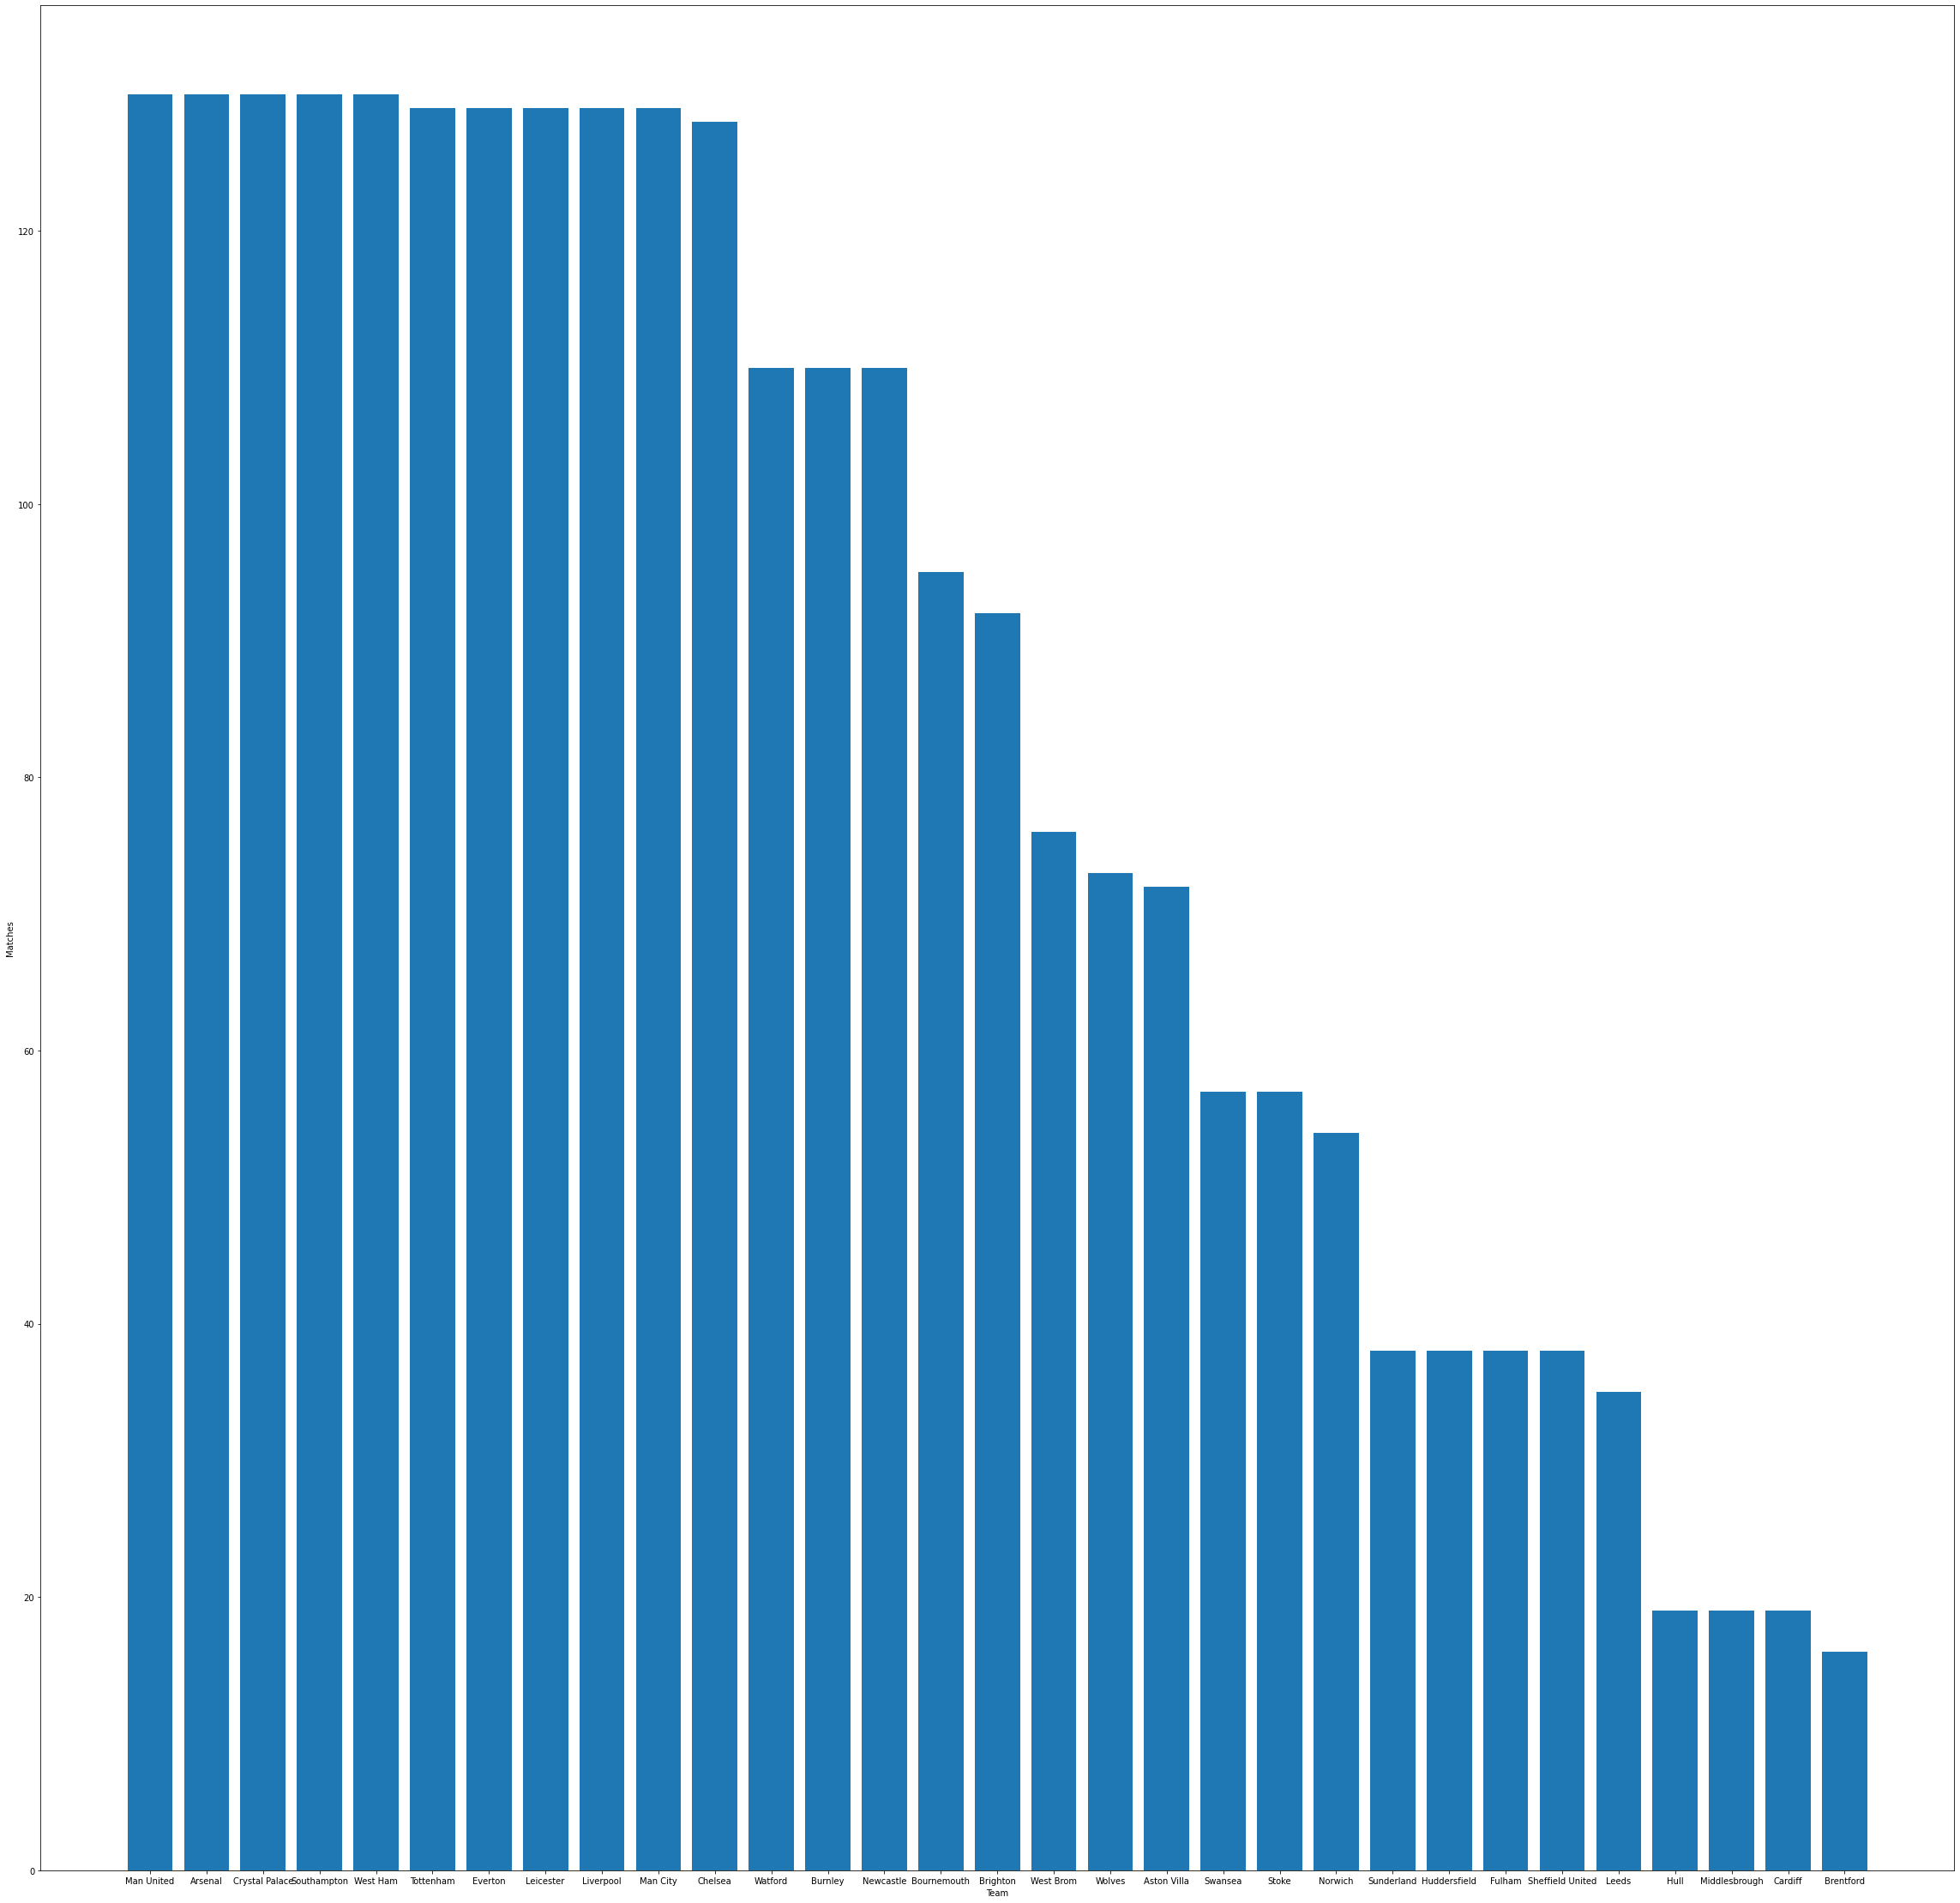

In [75]:
fig,ax=plt.subplots(figsize=(40, 40))
Team_home=data['HomeTeam'].value_counts()
Team_away=data['AwayTeam'].value_counts()

Index_home=Team_home.index
Resuls_home=Team_home.values


Index_away=Team_away.index
Resuls_away=Team_away.values


ax.bar(Index_home,Resuls_home)

#ax.set_xlabel('Result')
#ax.set_ylabel('Index')
#plt.hist(Team_home,bins=30)
#plt.hist(Team_away,bins=30)

ax.set_xlabel("Team")
ax.set_ylabel("Matches")


Text(0, 0.5, 'Matches')

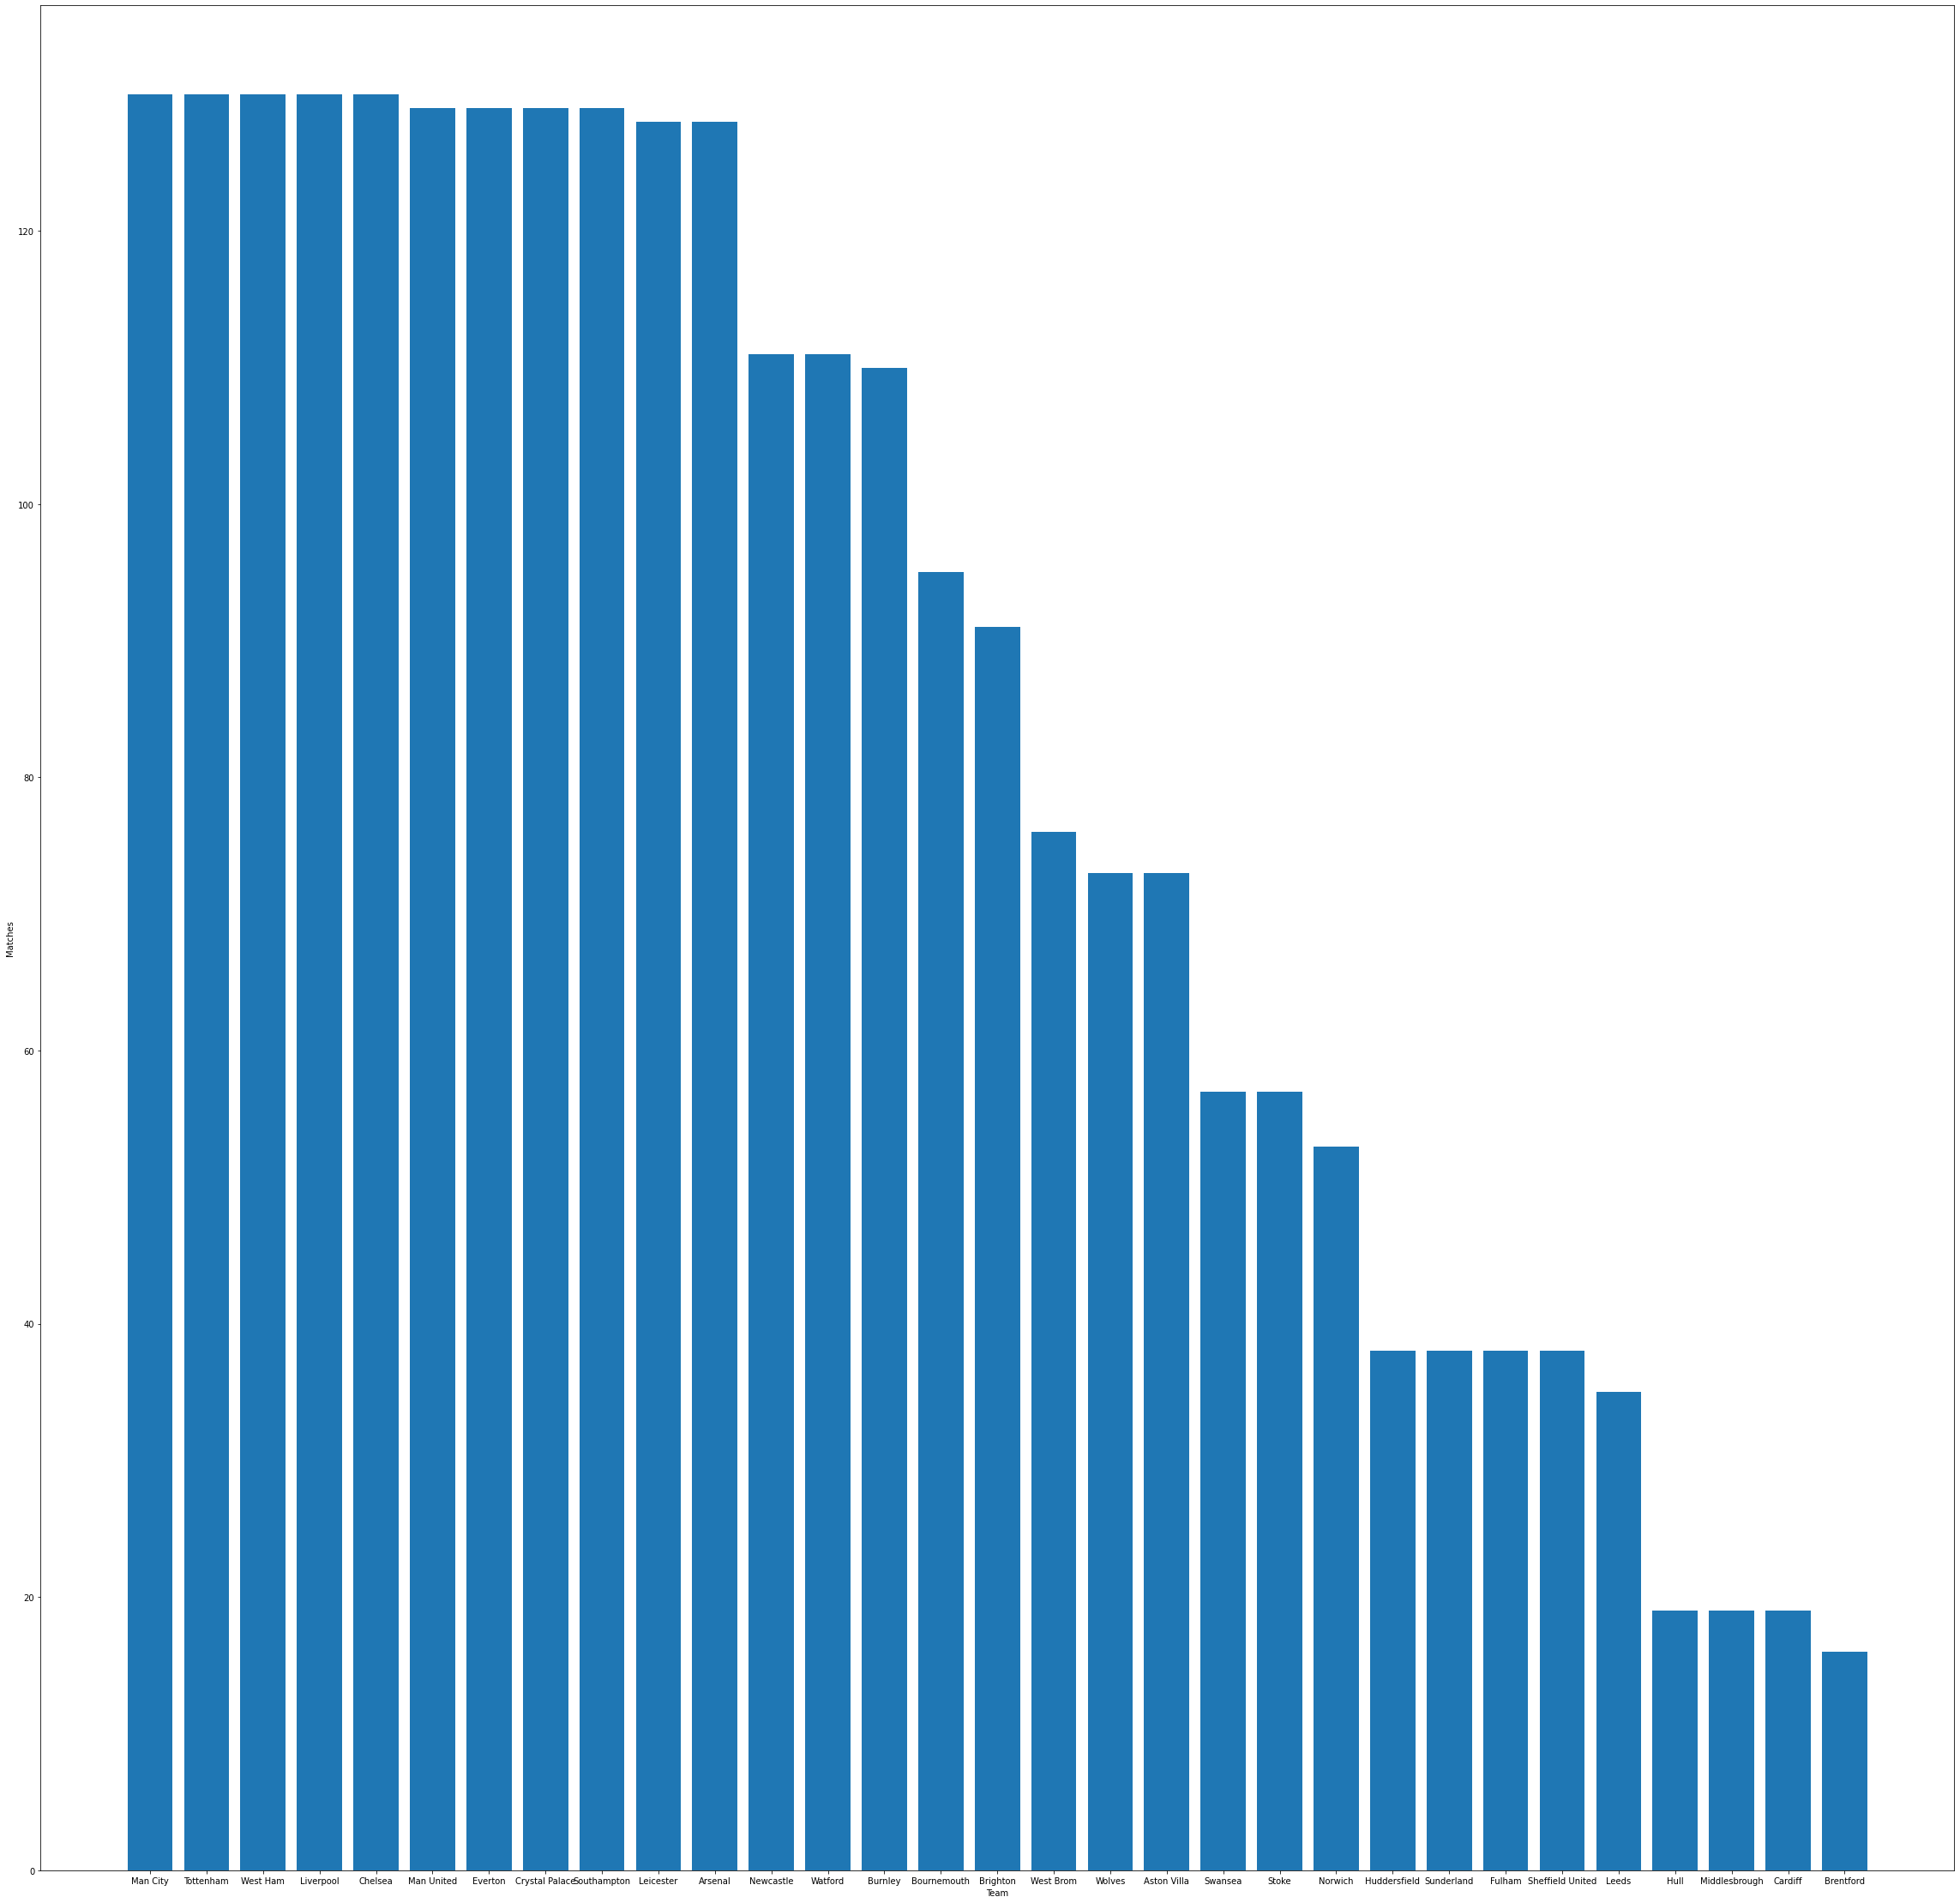

In [76]:
fig,ax=plt.subplots(figsize=(40, 40))
Team_away=data['AwayTeam'].value_counts()

Index_away=Team_away.index
Resuls_away=Team_away.values


ax.bar(Index_away,Resuls_away)

#ax.set_xlabel('Result')
#ax.set_ylabel('Index')
#plt.hist(Team_home,bins=30)
#plt.hist(Team_away,bins=30)

ax.set_xlabel("Team")
ax.set_ylabel("Matches")


In [77]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['FTR'])
one_hot_encoded_data

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,AC,HF,AF,HY,AY,HR,AR,FTR_A,FTR_D,FTR_H
8524,2015-16,2015-08-08T00:00:00Z,Bournemouth,Aston Villa,0,1,0.0,0.0,D,M Clattenburg,...,3.0,13.0,13.0,3.0,4.0,0.0,0.0,1,0,0
8525,2015-16,2015-08-08T00:00:00Z,Chelsea,Swansea,2,2,2.0,1.0,H,M Oliver,...,8.0,15.0,16.0,1.0,3.0,1.0,0.0,0,1,0
8526,2015-16,2015-08-08T00:00:00Z,Everton,Watford,2,2,0.0,1.0,A,M Jones,...,2.0,7.0,13.0,1.0,2.0,0.0,0.0,0,1,0
8527,2015-16,2015-08-08T00:00:00Z,Leicester,Sunderland,4,2,3.0,0.0,H,L Mason,...,3.0,13.0,17.0,2.0,4.0,0.0,0.0,0,0,1
8528,2015-16,2015-08-08T00:00:00Z,Man United,Tottenham,1,0,1.0,0.0,H,J Moss,...,2.0,12.0,12.0,2.0,3.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,0.0,1.0,A,G Scott,...,3.0,12.0,14.0,2.0,3.0,0.0,0.0,1,0,0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,0.0,0.0,D,M Atkinson,...,6.0,2.0,6.0,0.0,1.0,0.0,0.0,0,0,1
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,2.0,0.0,H,R Jones,...,4.0,11.0,12.0,1.0,1.0,0.0,0.0,0,0,1
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,1.0,0.0,H,M Oliver,...,7.0,12.0,10.0,1.0,1.0,0.0,0.0,0,0,1


In [78]:
one_hot_encoded_data_numeric=one_hot_encoded_data.drop(['Season','DateTime','HomeTeam','AwayTeam'],axis=1)
one_hot_encoded_data_numeric

,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,...,AC,HF,AF,HY,AY,HR,AR,FTR_A,FTR_D,FTR_H
8524,0,1,0.0,0.0,D,M Clattenburg,11.0,7.0,2.0,3.0,...,3.0,13.0,13.0,3.0,4.0,0.0,0.0,1,0,0
8525,2,2,2.0,1.0,H,M Oliver,11.0,18.0,3.0,10.0,...,8.0,15.0,16.0,1.0,3.0,1.0,0.0,0,1,0
8526,2,2,0.0,1.0,A,M Jones,10.0,11.0,5.0,5.0,...,2.0,7.0,13.0,1.0,2.0,0.0,0.0,0,1,0
8527,4,2,3.0,0.0,H,L Mason,19.0,10.0,8.0,5.0,...,3.0,13.0,17.0,2.0,4.0,0.0,0.0,0,0,1
8528,1,0,1.0,0.0,H,J Moss,9.0,9.0,1.0,4.0,...,2.0,12.0,12.0,2.0,3.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,0,4,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,...,3.0,12.0,14.0,2.0,3.0,0.0,0.0,1,0,0
11109,2,0,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,...,6.0,2.0,6.0,0.0,1.0,0.0,0.0,0,0,1
11110,2,1,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,...,4.0,11.0,12.0,1.0,1.0,0.0,0.0,0,0,1
11111,2,0,1.0,0.0,H,M Oliver,17.0,18.0,6.0,4.0,...,7.0,12.0,10.0,1.0,1.0,0.0,0.0,0,0,1


In [87]:
columns=one_hot_encoded_data_numeric.drop(['FTR_A','FTR_D','FTR_H','Referee'],axis=1)
columns

,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
8524,0,1,0.0,0.0,D,11.0,7.0,2.0,3.0,6.0,3.0,13.0,13.0,3.0,4.0,0.0,0.0
8525,2,2,2.0,1.0,H,11.0,18.0,3.0,10.0,4.0,8.0,15.0,16.0,1.0,3.0,1.0,0.0
8526,2,2,0.0,1.0,A,10.0,11.0,5.0,5.0,8.0,2.0,7.0,13.0,1.0,2.0,0.0,0.0
8527,4,2,3.0,0.0,H,19.0,10.0,8.0,5.0,6.0,3.0,13.0,17.0,2.0,4.0,0.0,0.0
8528,1,0,1.0,0.0,H,9.0,9.0,1.0,4.0,1.0,2.0,12.0,12.0,2.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,0,4,0.0,1.0,A,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2,0,0.0,0.0,D,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2,1,2.0,0.0,H,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2,0,1.0,0.0,H,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


In [88]:
c2=pd.DataFrame(columns)
c3=c2.columns
c3

Index(['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HC',
       'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [89]:
droped=data.drop(['Season','DateTime','HomeTeam','AwayTeam'],axis=1)
droped

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
8524,0,1,A,0.0,0.0,D,M Clattenburg,11.0,7.0,2.0,3.0,6.0,3.0,13.0,13.0,3.0,4.0,0.0,0.0
8525,2,2,D,2.0,1.0,H,M Oliver,11.0,18.0,3.0,10.0,4.0,8.0,15.0,16.0,1.0,3.0,1.0,0.0
8526,2,2,D,0.0,1.0,A,M Jones,10.0,11.0,5.0,5.0,8.0,2.0,7.0,13.0,1.0,2.0,0.0,0.0
8527,4,2,H,3.0,0.0,H,L Mason,19.0,10.0,8.0,5.0,6.0,3.0,13.0,17.0,2.0,4.0,0.0,0.0
8528,1,0,H,1.0,0.0,H,J Moss,9.0,9.0,1.0,4.0,1.0,2.0,12.0,12.0,2.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,0,4,A,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2,0,H,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2,1,H,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2,0,H,1.0,0.0,H,M Oliver,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


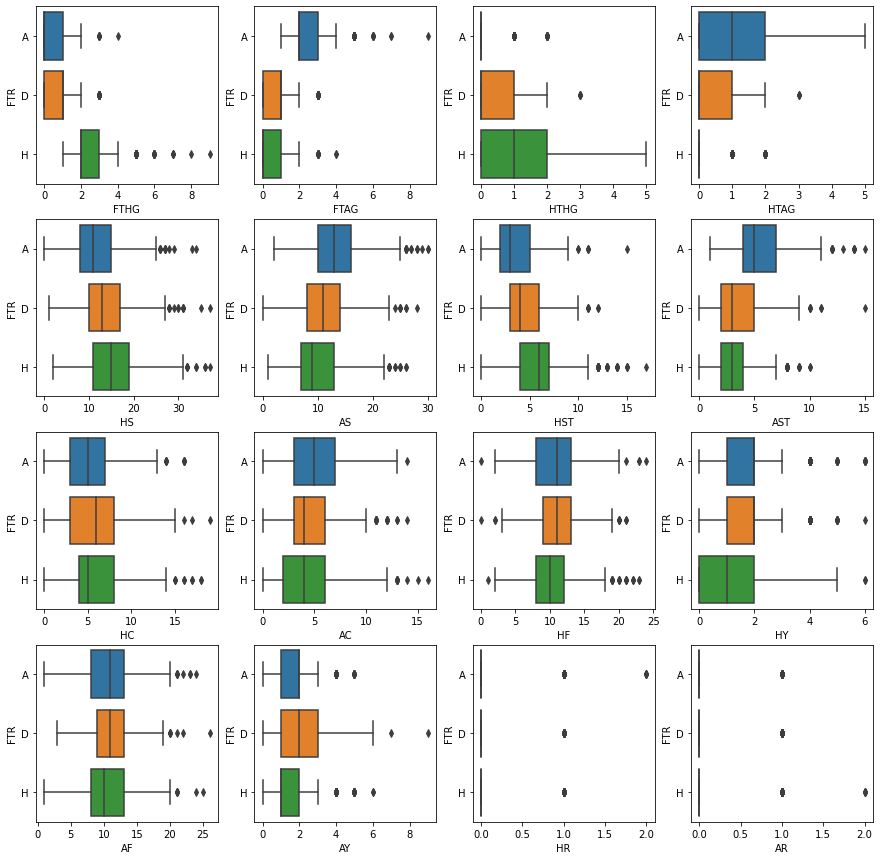

In [90]:
#for column in enumerate(columns):
#ax=fig.add_axes([0, 0, 1, 1])
f, axes = plt.subplots(4,4,figsize=(15, 15))
#box_coded=one_hot_encoded_data_numeric[["FTR_A","FTR_D","FTR_H"]]
#box_coded_1=[columns['FTHG'],data['FTR']]
#box_coded

#box_data=[columns,one_hot_encoded_data_numeric["FTR_A"]]
#bp =ax.boxplot(box_coded_1)
#plt.show()
#sns.boxplot(x=columns['FTAG'],y=data['FTR'])
#sns.boxplot(x=columns['FTAG'],y=data['FTR'])
i=1
#for name in (columns):
  #sns.boxplot(x="FTHG",y="FTR", ax=axes[i])
  #i+=1
#plt.tight_layout()
sns.boxplot(x=columns['FTHG'],y=data['FTR'], ax=axes[0][0])
sns.boxplot(x=columns['FTAG'],y=data['FTR'], ax=axes[0][1])
sns.boxplot(x=columns['HTHG'],y=data['FTR'], ax=axes[0][2])
sns.boxplot(x=columns['HTAG'],y=data['FTR'], ax=axes[0][3])
sns.boxplot(x=columns['HS'],y=data['FTR'], ax=axes[1][0])
sns.boxplot(x=columns['AS'],y=data['FTR'], ax=axes[1][1])
sns.boxplot(x=columns['HST'],y=data['FTR'], ax=axes[1][2])
sns.boxplot(x=columns['AST'],y=data['FTR'], ax=axes[1][3])
sns.boxplot(x=columns['HC'],y=data['FTR'], ax=axes[2][0])
sns.boxplot(x=columns['AC'],y=data['FTR'], ax=axes[2][1])
sns.boxplot(x=columns['HF'],y=data['FTR'], ax=axes[2][2])
sns.boxplot(x=columns['HY'],y=data['FTR'], ax=axes[2][3])
sns.boxplot(x=columns['AF'],y=data['FTR'], ax=axes[3][0])
sns.boxplot(x=columns['AY'],y=data['FTR'], ax=axes[3][1])
sns.boxplot(x=columns['HR'],y=data['FTR'], ax=axes[3][2])
sns.boxplot(x=columns['AR'],y=data['FTR'], ax=axes[3][3])

#ax.boxplot(x=columns['HTHG'],y=data['FTR'])

#sns.boxplot(x=columns[["FTHG","FTAG","HTHG"	,"HTAG"	,"HTR",	"HS","AS","HST","AST","HC","AC","HF","AF","HY","AY","HR","AR"]],y=data['FTR'])

In [120]:
data_copy=data.copy()
data_copy.drop('Referee', axis=1, inplace=True)
data_copy.head()


,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
8524,2015-16,2015-08-08T00:00:00Z,Bournemouth,Aston Villa,0,1,A,0.0,0.0,D,...,2.0,3.0,6.0,3.0,13.0,13.0,3.0,4.0,0.0,0.0
8525,2015-16,2015-08-08T00:00:00Z,Chelsea,Swansea,2,2,D,2.0,1.0,H,...,3.0,10.0,4.0,8.0,15.0,16.0,1.0,3.0,1.0,0.0
8526,2015-16,2015-08-08T00:00:00Z,Everton,Watford,2,2,D,0.0,1.0,A,...,5.0,5.0,8.0,2.0,7.0,13.0,1.0,2.0,0.0,0.0
8527,2015-16,2015-08-08T00:00:00Z,Leicester,Sunderland,4,2,H,3.0,0.0,H,...,8.0,5.0,6.0,3.0,13.0,17.0,2.0,4.0,0.0,0.0
8528,2015-16,2015-08-08T00:00:00Z,Man United,Tottenham,1,0,H,1.0,0.0,H,...,1.0,4.0,1.0,2.0,12.0,12.0,2.0,3.0,0.0,0.0


In [121]:
#converting the matchdate into date time format
data_copy["Date_of_the_match"] = pd.to_datetime(data_copy["DateTime"], infer_datetime_format=True)
data_copy['Day_of_the_match'] = data_copy['Date_of_the_match'].dt.day_name()
#checking that the date and day was converted sucessfully
print(data_copy["Date_of_the_match"][8904])
print(data_copy['Day_of_the_match'][8904])
data_copy.drop('DateTime', axis=1, inplace=True)
data_copy.drop('Date_of_the_match', axis=1, inplace=True)
data_copy.head()

2016-08-13 00:00:00
Saturday


,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,Day_of_the_match
8524,2015-16,Bournemouth,Aston Villa,0,1,A,0.0,0.0,D,11.0,...,3.0,6.0,3.0,13.0,13.0,3.0,4.0,0.0,0.0,Saturday
8525,2015-16,Chelsea,Swansea,2,2,D,2.0,1.0,H,11.0,...,10.0,4.0,8.0,15.0,16.0,1.0,3.0,1.0,0.0,Saturday
8526,2015-16,Everton,Watford,2,2,D,0.0,1.0,A,10.0,...,5.0,8.0,2.0,7.0,13.0,1.0,2.0,0.0,0.0,Saturday
8527,2015-16,Leicester,Sunderland,4,2,H,3.0,0.0,H,19.0,...,5.0,6.0,3.0,13.0,17.0,2.0,4.0,0.0,0.0,Saturday
8528,2015-16,Man United,Tottenham,1,0,H,1.0,0.0,H,9.0,...,4.0,1.0,2.0,12.0,12.0,2.0,3.0,0.0,0.0,Saturday


In [122]:
#converting the data in the copied variable into one hot encoded 
#The features that was converted was the string data which is the home and away team along with the half time result and match day in order to check whihc team had
#a recovery day more than the other
data_copy = pd.get_dummies(data_copy, columns = ['HomeTeam'])
data_copy = pd.get_dummies(data_copy, columns = ['AwayTeam'])
data_copy = pd.get_dummies(data_copy, columns = ['HTR'])
data_copy = pd.get_dummies(data_copy, columns = ['Day_of_the_match'])
data_copy.head()

,Season,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,...,HTR_A,HTR_D,HTR_H,Day_of_the_match_Friday,Day_of_the_match_Monday,Day_of_the_match_Saturday,Day_of_the_match_Sunday,Day_of_the_match_Thursday,Day_of_the_match_Tuesday,Day_of_the_match_Wednesday
8524,2015-16,0,1,A,0.0,0.0,11.0,7.0,2.0,3.0,...,0,1,0,0,0,1,0,0,0,0
8525,2015-16,2,2,D,2.0,1.0,11.0,18.0,3.0,10.0,...,0,0,1,0,0,1,0,0,0,0
8526,2015-16,2,2,D,0.0,1.0,10.0,11.0,5.0,5.0,...,1,0,0,0,0,1,0,0,0,0
8527,2015-16,4,2,H,3.0,0.0,19.0,10.0,8.0,5.0,...,0,0,1,0,0,1,0,0,0,0
8528,2015-16,1,0,H,1.0,0.0,9.0,9.0,1.0,4.0,...,0,0,1,0,0,1,0,0,0,0


In [123]:
data_copy['HomeTeam_Arsenal']

8524     0
8525     0
8526     0
8527     0
8528     0
        ..
11108    0
11109    0
11110    0
11111    0
11112    0
Name: HomeTeam_Arsenal, Length: 2589, dtype: uint8

In [124]:
label_encoder = LabelEncoder()
data_copy['FTR']=label_encoder.fit_transform(data_copy['FTR'])

In [125]:
data_copy['FTR']

8524     0
8525     1
8526     1
8527     2
8528     2
        ..
11108    0
11109    2
11110    2
11111    2
11112    1
Name: FTR, Length: 2589, dtype: int64

In [126]:
unique_values=[]
for i in (data_copy['FTR']):
  if (i not in unique_values):
    unique_values.append(i)
print(unique_values)

[0, 1, 2]


In [128]:
label_encoder = LabelEncoder()
data_copy['FTR']= label_encoder.fit_transform(data_copy['FTR'])
#Converting the Full time result into one hot encoded data to convert the string into numeric
print('Unique values: ', data_copy['FTR'].unique())
print('if home team wins, points will be ', unique_values[2])
print('if away team wins, points will be', unique_values[0])
print('if tie, points will be', unique_values[1])
#These values will determined the result of the match in case we want to find the output
label = data_copy['FTR']
print('the result for the match in row 9052 is ', label[9052])
print(data_copy.iloc[:,4:90])
features = data_copy.iloc[:,4:90]

Unique values:  [0 1 2]
if home team wins, points will be  2
if away team wins, points will be 0
if tie, points will be 1
the result for the match in row 9052 is  2
       HTHG  HTAG    HS    AS  HST   AST   HC   AC    HF    AF  ...  HTR_A  \
8524    0.0   0.0  11.0   7.0  2.0   3.0  6.0  3.0  13.0  13.0  ...      0   
8525    2.0   1.0  11.0  18.0  3.0  10.0  4.0  8.0  15.0  16.0  ...      0   
8526    0.0   1.0  10.0  11.0  5.0   5.0  8.0  2.0   7.0  13.0  ...      1   
8527    3.0   0.0  19.0  10.0  8.0   5.0  6.0  3.0  13.0  17.0  ...      0   
8528    1.0   0.0   9.0   9.0  1.0   4.0  1.0  2.0  12.0  12.0  ...      0   
...     ...   ...   ...   ...  ...   ...  ...  ...   ...   ...  ...    ...   
11108   0.0   1.0   9.0  11.0  8.0   5.0  9.0  3.0  12.0  14.0  ...      1   
11109   0.0   0.0  15.0   5.0  7.0   1.0  4.0  6.0   2.0   6.0  ...      0   
11110   2.0   0.0  12.0  11.0  3.0   3.0  3.0  4.0  11.0  12.0  ...      0   
11111   1.0   0.0  17.0  18.0  6.0   4.0  6.0  7.0  12.

In [131]:
print(data_copy.iloc[:,4:100])

       HTHG  HTAG    HS    AS  HST   AST   HC   AC    HF    AF  ...  HTR_A  \
8524    0.0   0.0  11.0   7.0  2.0   3.0  6.0  3.0  13.0  13.0  ...      0   
8525    2.0   1.0  11.0  18.0  3.0  10.0  4.0  8.0  15.0  16.0  ...      0   
8526    0.0   1.0  10.0  11.0  5.0   5.0  8.0  2.0   7.0  13.0  ...      1   
8527    3.0   0.0  19.0  10.0  8.0   5.0  6.0  3.0  13.0  17.0  ...      0   
8528    1.0   0.0   9.0   9.0  1.0   4.0  1.0  2.0  12.0  12.0  ...      0   
...     ...   ...   ...   ...  ...   ...  ...  ...   ...   ...  ...    ...   
11108   0.0   1.0   9.0  11.0  8.0   5.0  9.0  3.0  12.0  14.0  ...      1   
11109   0.0   0.0  15.0   5.0  7.0   1.0  4.0  6.0   2.0   6.0  ...      0   
11110   2.0   0.0  12.0  11.0  3.0   3.0  3.0  4.0  11.0  12.0  ...      0   
11111   1.0   0.0  17.0  18.0  6.0   4.0  6.0  7.0  12.0  10.0  ...      0   
11112   2.0   1.0  11.0   6.0  5.0   4.0  4.0  1.0   9.0  11.0  ...      0   

       HTR_D  HTR_H  Day_of_the_match_Friday  Day_of_the_match_

In [132]:
features 

,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,...,HTR_A,HTR_D,HTR_H,Day_of_the_match_Friday,Day_of_the_match_Monday,Day_of_the_match_Saturday,Day_of_the_match_Sunday,Day_of_the_match_Thursday,Day_of_the_match_Tuesday,Day_of_the_match_Wednesday
8524,0.0,0.0,11.0,7.0,2.0,3.0,6.0,3.0,13.0,13.0,...,0,1,0,0,0,1,0,0,0,0
8525,2.0,1.0,11.0,18.0,3.0,10.0,4.0,8.0,15.0,16.0,...,0,0,1,0,0,1,0,0,0,0
8526,0.0,1.0,10.0,11.0,5.0,5.0,8.0,2.0,7.0,13.0,...,1,0,0,0,0,1,0,0,0,0
8527,3.0,0.0,19.0,10.0,8.0,5.0,6.0,3.0,13.0,17.0,...,0,0,1,0,0,1,0,0,0,0
8528,1.0,0.0,9.0,9.0,1.0,4.0,1.0,2.0,12.0,12.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,0.0,1.0,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,...,1,0,0,0,0,1,0,0,0,0
11109,0.0,0.0,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,...,0,1,0,0,0,0,1,0,0,0
11110,2.0,0.0,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,...,0,0,1,0,0,0,1,0,0,0
11111,1.0,0.0,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,...,0,0,1,0,0,0,1,0,0,0


In [133]:
data_copy

,Season,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,...,HTR_A,HTR_D,HTR_H,Day_of_the_match_Friday,Day_of_the_match_Monday,Day_of_the_match_Saturday,Day_of_the_match_Sunday,Day_of_the_match_Thursday,Day_of_the_match_Tuesday,Day_of_the_match_Wednesday
8524,2015-16,0,1,0,0.0,0.0,11.0,7.0,2.0,3.0,...,0,1,0,0,0,1,0,0,0,0
8525,2015-16,2,2,1,2.0,1.0,11.0,18.0,3.0,10.0,...,0,0,1,0,0,1,0,0,0,0
8526,2015-16,2,2,1,0.0,1.0,10.0,11.0,5.0,5.0,...,1,0,0,0,0,1,0,0,0,0
8527,2015-16,4,2,2,3.0,0.0,19.0,10.0,8.0,5.0,...,0,0,1,0,0,1,0,0,0,0
8528,2015-16,1,0,2,1.0,0.0,9.0,9.0,1.0,4.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,0,4,0,0.0,1.0,9.0,11.0,8.0,5.0,...,1,0,0,0,0,1,0,0,0,0
11109,2021-22,2,0,2,0.0,0.0,15.0,5.0,7.0,1.0,...,0,1,0,0,0,0,1,0,0,0
11110,2021-22,2,1,2,2.0,0.0,12.0,11.0,3.0,3.0,...,0,0,1,0,0,0,1,0,0,0
11111,2021-22,2,0,2,1.0,0.0,17.0,18.0,6.0,4.0,...,0,0,1,0,0,0,1,0,0,0


In [134]:
data_copy['FTR']

8524     0
8525     1
8526     1
8527     2
8528     2
        ..
11108    0
11109    2
11110    2
11111    2
11112    1
Name: FTR, Length: 2589, dtype: int64

In [138]:
#checking the shape of the data 
y=np.ravel(label)
X = features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)
print("The shape of X_train is " , X_train.shape)
print("The size of y_train is " , y_train.shape)
print("The size of X_test set is " , X_test.shape)
print("The size of y_test is " , y_test.shape)

The shape of X_train is  (1734, 86)
The size of y_train is  (1734,)
The size of X_test set is  (855, 86)
The size of y_test is  (855,)


In [139]:
#Converting The y train and y test into 3 cleasses as we have 3 classes of outputs which is home, away and tie
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)
print("The size of y_train is " + str(y_train.shape))
print("The size of y_test is " + str(y_test.shape))
print(y_train[0])

The size of y_train is (1734, 3)
The size of y_test is (855, 3)
[1. 0. 0.]


In [140]:
y_train

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [141]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [142]:

from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

In [ ]:
#Building the neural network model 

In [143]:
#Building the model using the sequentail model which allow us to flow into the next layer and take the input from the previous
model = tf.keras.models.Sequential([
#putting the neurons at 330 to carry the data and the input dimension is 86 as we have 86 features
#using leaky relu to over come the dying relu issue
tf.keras.layers.Dense(330, input_dim=86, activation=tf.keras.layers.LeakyReLU()),
tf.keras.layers.Dense(260, input_dim=330, activation=tf.keras.layers.LeakyReLU()),
tf.keras.layers.Dense(3,activation='softmax'),
#tf.keras.layers.Conv2D(filters=3, kernel_size=5)
#tf.keras.layers.Dropout(0.1)
# model.add(LSTM(54,input_shape = (7, 339)),return_sequences=True, 
#                dropout=0.1, recurrent_dropout=0.1,)
])
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 330)               28710     
                                                                 
 dense_9 (Dense)             (None, 260)               86060     
                                                                 
 dense_10 (Dense)            (None, 3)                 783       
                                                                 
Total params: 115,553
Trainable params: 115,553
Non-trainable params: 0
_________________________________________________________________


In [144]:

y_train

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [145]:
history = model.fit(X_train, y_train, epochs=65)


Epoch 1/65
55/55 [==============================] - 1s 4ms/step - loss: 1.0495 - accuracy: 0.5559
Epoch 2/65
55/55 [==============================] - 0s 3ms/step - loss: 0.7854 - accuracy: 0.6448
Epoch 3/65
55/55 [==============================] - 0s 4ms/step - loss: 0.7522 - accuracy: 0.6597
Epoch 4/65
55/55 [==============================] - 0s 4ms/step - loss: 0.7589 - accuracy: 0.6632
Epoch 5/65
55/55 [==============================] - 0s 4ms/step - loss: 0.7238 - accuracy: 0.6678
Epoch 6/65
55/55 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.6984
Epoch 7/65
55/55 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.6990
Epoch 8/65
55/55 [==============================] - 0s 3ms/step - loss: 0.6593 - accuracy: 0.7007
Epoch 9/65
55/55 [==============================] - 0s 4ms/step - loss: 0.6615 - accuracy: 0.7059
Epoch 10/65
55/55 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.6984
Epoch 11/65
55/55 [

In [146]:
features.columns

for i in range (len(features.columns)):
  print(features.columns[i] ,"==", i)

HTHG == 0
HTAG == 1
HS == 2
AS == 3
HST == 4
AST == 5
HC == 6
AC == 7
HF == 8
AF == 9
HY == 10
AY == 11
HR == 12
AR == 13
HomeTeam_Arsenal == 14
HomeTeam_Aston Villa == 15
HomeTeam_Bournemouth == 16
HomeTeam_Brentford == 17
HomeTeam_Brighton == 18
HomeTeam_Burnley == 19
HomeTeam_Cardiff == 20
HomeTeam_Chelsea == 21
HomeTeam_Crystal Palace == 22
HomeTeam_Everton == 23
HomeTeam_Fulham == 24
HomeTeam_Huddersfield == 25
HomeTeam_Hull == 26
HomeTeam_Leeds == 27
HomeTeam_Leicester == 28
HomeTeam_Liverpool == 29
HomeTeam_Man City == 30
HomeTeam_Man United == 31
HomeTeam_Middlesbrough == 32
HomeTeam_Newcastle == 33
HomeTeam_Norwich == 34
HomeTeam_Sheffield United == 35
HomeTeam_Southampton == 36
HomeTeam_Stoke == 37
HomeTeam_Sunderland == 38
HomeTeam_Swansea == 39
HomeTeam_Tottenham == 40
HomeTeam_Watford == 41
HomeTeam_West Brom == 42
HomeTeam_West Ham == 43
HomeTeam_Wolves == 44
AwayTeam_Arsenal == 45
AwayTeam_Aston Villa == 46
AwayTeam_Bournemouth == 47
AwayTeam_Brentford == 48
AwayTeam_Bri

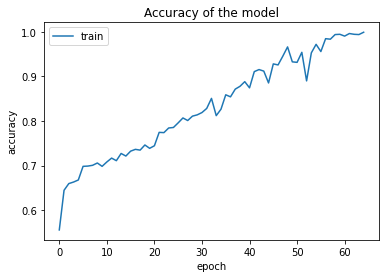

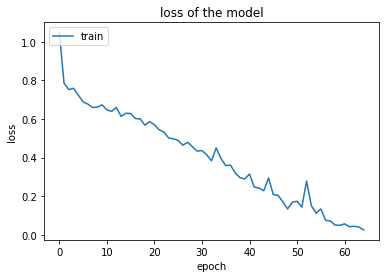

In [147]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy of the model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.title('loss of the model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [148]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

27/27 [==============================] - 0s 2ms/step - loss: 1.9940 - accuracy: 0.6246
Test Score: 1.9939905405044556
Test Accuracy: 0.6245614290237427


In [150]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [151]:
Xnew = np.array([[0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                  0,0,0,0,0,0,0,0,0,0, 1]]) 


ynew = np.argmax(model.predict(Xnew), axis=-1)
# show the inputs and predicted outputs
print("X = %s " % Xnew)
print("Prediction = %s" % ynew[0])

1/1 [==============================] - 0s 143ms/step
X = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1]] 
Prediction = 2


In [152]:
np.where(Xnew==17)

(array([], dtype=int64), array([], dtype=int64))

In [153]:
X_test

,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,...,HTR_A,HTR_D,HTR_H,Day_of_the_match_Friday,Day_of_the_match_Monday,Day_of_the_match_Saturday,Day_of_the_match_Sunday,Day_of_the_match_Thursday,Day_of_the_match_Tuesday,Day_of_the_match_Wednesday
10258,1.0,0.0,13.0,8.0,6.0,3.0,4.0,2.0,18.0,7.0,...,0,0,1,0,0,1,0,0,0,0
10259,1.0,1.0,9.0,5.0,4.0,1.0,5.0,2.0,13.0,12.0,...,0,1,0,0,0,1,0,0,0,0
10260,0.0,1.0,14.0,13.0,4.0,7.0,4.0,3.0,4.0,8.0,...,1,0,0,0,0,1,0,0,0,0
10261,0.0,1.0,10.0,18.0,1.0,6.0,5.0,5.0,3.0,13.0,...,1,0,0,0,0,0,1,0,0,0
10262,0.0,4.0,7.0,22.0,1.0,12.0,2.0,4.0,5.0,12.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,0.0,1.0,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,...,1,0,0,0,0,1,0,0,0,0
11109,0.0,0.0,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,...,0,1,0,0,0,0,1,0,0,0
11110,2.0,0.0,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,...,0,0,1,0,0,0,1,0,0,0
11111,1.0,0.0,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,...,0,0,1,0,0,0,1,0,0,0


In [154]:
np.argmax(model.predict(X_test), axis=-1)


27/27 [==============================] - 0s 3ms/step


array([2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 2, 2,
       2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 1,
       2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 2,
       1, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2,
       0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0,

In [155]:
model.predict(X_test)

27/27 [==============================] - 0s 2ms/step


array([[1.0394324e-12, 5.7629457e-09, 9.9999994e-01],
       [7.7164486e-07, 3.3413893e-01, 6.6586030e-01],
       [1.6887291e-01, 1.8361468e-02, 8.1276554e-01],
       ...,
       [5.0224380e-06, 6.2534571e-02, 9.3746048e-01],
       [1.8484256e-03, 6.5639399e-02, 9.3251216e-01],
       [1.1268329e-05, 3.9086150e-04, 9.9959785e-01]], dtype=float32)

In [157]:
X_test

,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,...,HTR_A,HTR_D,HTR_H,Day_of_the_match_Friday,Day_of_the_match_Monday,Day_of_the_match_Saturday,Day_of_the_match_Sunday,Day_of_the_match_Thursday,Day_of_the_match_Tuesday,Day_of_the_match_Wednesday
10258,1.0,0.0,13.0,8.0,6.0,3.0,4.0,2.0,18.0,7.0,...,0,0,1,0,0,1,0,0,0,0
10259,1.0,1.0,9.0,5.0,4.0,1.0,5.0,2.0,13.0,12.0,...,0,1,0,0,0,1,0,0,0,0
10260,0.0,1.0,14.0,13.0,4.0,7.0,4.0,3.0,4.0,8.0,...,1,0,0,0,0,1,0,0,0,0
10261,0.0,1.0,10.0,18.0,1.0,6.0,5.0,5.0,3.0,13.0,...,1,0,0,0,0,0,1,0,0,0
10262,0.0,4.0,7.0,22.0,1.0,12.0,2.0,4.0,5.0,12.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,0.0,1.0,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,...,1,0,0,0,0,1,0,0,0,0
11109,0.0,0.0,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,...,0,1,0,0,0,0,1,0,0,0
11110,2.0,0.0,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,...,0,0,1,0,0,0,1,0,0,0
11111,1.0,0.0,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,...,0,0,1,0,0,0,1,0,0,0


In [159]:
#Building the Gaussian naive bayes model with the neural layers

In [160]:
GaussianNB_model= GaussianNB()
GaussianNB_model = tf.keras.models.Sequential([
tf.keras.layers.Dense(350, input_dim=86, activation=tf.keras.layers.LeakyReLU()),
tf.keras.layers.Dense(350, input_dim=350, activation=tf.keras.layers.LeakyReLU()),
tf.keras.layers.Dense(350, input_dim=350, activation=tf.keras.layers.ReLU()),
tf.keras.layers.Dense(350, input_dim=350, activation=tf.keras.layers.ReLU()),
tf.keras.layers.Dense(3,activation='softmax'),
#tf.keras.layers.Conv2D(filters=3, kernel_size=5)
#tf.keras.layers.Dropout(0.1)
# model.add(LSTM(54,input_shape = (7, 339)),return_sequences=True, 
#                dropout=0.1, recurrent_dropout=0.1,)
])
GaussianNB_model.summary()
#different loss function that compensate instead of huber loss and different optimizer that compensate the Gradient descent problem
GaussianNB_model.compile(loss = 'huber_loss', optimizer='SGD', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 350)               30450     
                                                                 
 dense_17 (Dense)            (None, 350)               122850    
                                                                 
 dense_18 (Dense)            (None, 350)               122850    
                                                                 
 dense_19 (Dense)            (None, 350)               122850    
                                                                 
 dense_20 (Dense)            (None, 3)                 1053      
                                                                 
Total params: 400,053
Trainable params: 400,053
Non-trainable params: 0
_________________________________________________________________


In [161]:
history_Reg = GaussianNB_model.fit(X_train, y_train, epochs=65)

Epoch 1/65
55/55 [==============================] - 1s 7ms/step - loss: 0.0998 - accuracy: 0.5409
Epoch 2/65
55/55 [==============================] - 0s 6ms/step - loss: 0.0947 - accuracy: 0.5761
Epoch 3/65
55/55 [==============================] - 0s 6ms/step - loss: 0.0917 - accuracy: 0.5767
Epoch 4/65
55/55 [==============================] - 0s 7ms/step - loss: 0.0894 - accuracy: 0.5940
Epoch 5/65
55/55 [==============================] - 0s 6ms/step - loss: 0.0879 - accuracy: 0.5957
Epoch 6/65
55/55 [==============================] - 0s 6ms/step - loss: 0.0863 - accuracy: 0.6027
Epoch 7/65
55/55 [==============================] - 0s 7ms/step - loss: 0.0846 - accuracy: 0.6153
Epoch 8/65
55/55 [==============================] - 0s 6ms/step - loss: 0.0835 - accuracy: 0.6171
Epoch 9/65
55/55 [==============================] - 0s 6ms/step - loss: 0.0826 - accuracy: 0.6223
Epoch 10/65
55/55 [==============================] - 0s 7ms/step - loss: 0.0814 - accuracy: 0.6286
Epoch 11/65
55/55 [

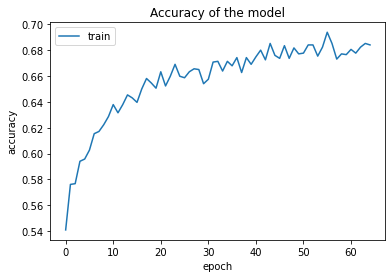

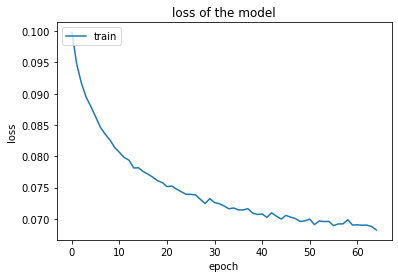

In [162]:
plt.plot(history_Reg.history['accuracy'])
plt.title('Accuracy of the model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


plt.plot(history_Reg.history['loss'])
plt.title('loss of the model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [164]:
Test_accuracy = GaussianNB_model.fit(X_test, y_test, epochs=65)

Epoch 1/65
27/27 [==============================] - 0s 7ms/step - loss: 0.0702 - accuracy: 0.6749
Epoch 2/65
27/27 [==============================] - 0s 6ms/step - loss: 0.0701 - accuracy: 0.6678
Epoch 3/65
27/27 [==============================] - 0s 7ms/step - loss: 0.0694 - accuracy: 0.6842
Epoch 4/65
27/27 [==============================] - 0s 6ms/step - loss: 0.0694 - accuracy: 0.6749
Epoch 5/65
27/27 [==============================] - 0s 6ms/step - loss: 0.0695 - accuracy: 0.6784
Epoch 6/65
27/27 [==============================] - 0s 6ms/step - loss: 0.0691 - accuracy: 0.6784
Epoch 7/65
27/27 [==============================] - 0s 7ms/step - loss: 0.0686 - accuracy: 0.6795
Epoch 8/65
27/27 [==============================] - 0s 7ms/step - loss: 0.0685 - accuracy: 0.6749
Epoch 9/65
27/27 [==============================] - 0s 7ms/step - loss: 0.0685 - accuracy: 0.6901
Epoch 10/65
27/27 [==============================] - 0s 7ms/step - loss: 0.0677 - accuracy: 0.6819
Epoch 11/65
27/27 [

In [165]:
score_test = GaussianNB_model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score_test[0])
print("Test Accuracy:", score_test[1])

27/27 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.7216
Test Score: 0.06283844262361526
Test Accuracy: 0.7216374278068542


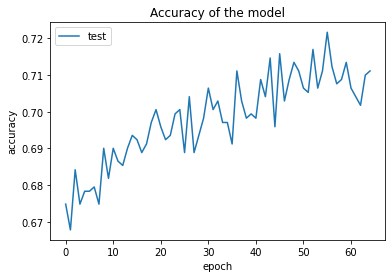

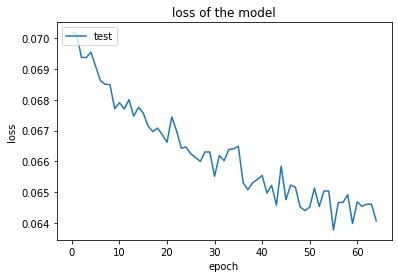

In [166]:
plt.plot(Test_accuracy.history['accuracy'])
plt.title('Accuracy of the model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()


plt.plot(Test_accuracy.history['loss'])
plt.title('loss of the model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

In [167]:
score_test

[0.06283844262361526, 0.7216374278068542]